#  ANN

> Réaliser par Mohamed ELFILALI

## Tester performance de Réseau de Neuronne avec différents paramètres

L'Objectif du TP est de trouver les paramètres les plus pertinents de ANN (**Artificial Neural Network** - Réseau de Neuronne Artificiel)

In [2]:
from sklearn import datasets, model_selection
from sklearn.metrics import precision_score
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import accuracy_score

import warnings; 
warnings.simplefilter('ignore')

Tout d’abord on va couper notre jeu donné en deux parties ; la partie qui va servir pour l’apprentissage et l’autre pour l’entrainement. Pour cela on va utiliser la méthode « model_selection » avec une liste d’indice aléatoire pour bien mélanger nos données

In [8]:
#load data
wine = datasets.fetch_mldata('MNIST original')

wine = datasets.load_wine()

data = wine.data
target = wine.target

Par la suite, on essaie de tester de manière exhautive les valeurs possibles de chaque paramètre. Chaque paramètre prends en compte la valeur optimum en temps d'exécution de paramtère analysé précédent pour but d'accélérer l'expérimentation.

### Les couches de ANN

Pour des raisons de limite de calcul de machine personnelle, on se limite par tester le nombre de couche entre 1 et 10. Chaque couche dispose 50 neurone.

In [9]:
max_l = 10
min_l = 1
precisions = []
error_rate = []
temps_execs = []

# split donnée
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    data, target, train_size=0.8, test_size=0.2)

for n_layer in range (min_l,max_l):
    # Init modèle
    MLP_model = MLPClassifier(hidden_layer_sizes = (50,)*n_layer)
    t_before = time()
    MLP_model.fit(x_train, y_train)
    t_after = time()
    
    y_predict = MLP_model.predict(x_test)
    
    temps_execs.append(t_after - t_before)
    precisions.append(precision_score(y_test, y_predict, average='micro'))
    error_rate.append(1 - accuracy_score(y_test, y_predict))
    print('.', end='')

.........

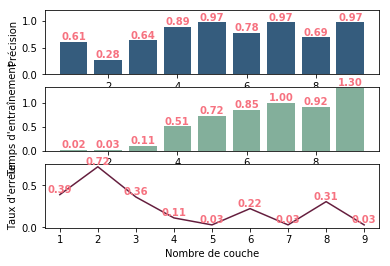

Meilleur nombre de couche pour la précision :  5
Meilleur nombre de couche pour le temps d'entraînement :  1


In [37]:
plt.subplot(3, 1, 1)
plt.bar(range(min_l,max_l) , precisions, color='#355C7D')
plt.ylim(0,1.2)
for i in range(0,max_l-min_l):
    plt.text(i+1, precisions[i], 
             "%.2f"%precisions[i], 
             fontweight='bold', 
             color='#F67280', 
             ha='center', va='bottom')
plt.ylabel("Précision")
    
plt.subplot(3, 1, 2)
plt.bar(range(min_l,max_l) , temps_execs, color='#83AF9B')
plt.ylim(0, max(temps_execs) + min(temps_execs))
for i in range(0,max_l-min_l):
    plt.text(i+1, temps_execs[i], 
             "%.2f"%temps_execs[i], 
             fontweight='bold', 
             color='#F67280', 
             ha='center', 
             va='bottom')
plt.ylabel("Temps d'entraînement")

plt.subplot(3, 1, 3)
plt.plot(range(min_l,max_l) , error_rate, color='#651E3E')
for i in range(0,max_l-min_l):
    plt.text(i+1, error_rate[i], 
             "%.2f"%error_rate[i], 
             fontweight='bold', 
             color='#F67280', 
             ha='center', 
             va='bottom')
plt.ylabel("Taux d'erreur")

plt.xlabel("Nombre de couche")
plt.show() 

print("Meilleur nombre de couche pour la précision : ", np.argmax(precisions)+1)
print("Meilleur nombre de couche pour le temps d'entraînement : ", np.argmin(temps_execs)+1)

Testons maintenant les tailles différents des couches. 

In [39]:
couche_optimal = 5
tailles = np.arange(10, 70, 10)
size = tailles.size
precisions = np.zeros(size)
temps_execs = np.zeros(size)
error_rate = np.zeros(size)

# split donnée
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    data, target, train_size=0.8, test_size=0.2)

for i in range(size):
    
    hidden_layer = (tailles[i],)*(couche_optimal)
    t_before = time()
    
    # Init modèle
    MLP_model = MLPClassifier(hidden_layer_sizes = hidden_layer)
    MLP_model.fit(x_train, y_train)
    
    t_after = time()
    y_predict = MLP_model.predict(x_test)
    
    temps_execs[i] = t_after - t_before
    precisions[i] = precision_score(y_test, y_predict, average='micro')
    error_rate[i] = 1 - accuracy_score(y_test, y_predict)
    print('.', end='')

......

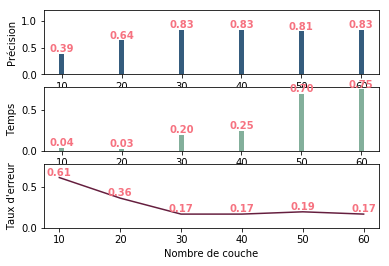

Meilleur nombre de couche pour la précision :  30
Meilleur nombre de couche pour le temps d'entraînement :  20


In [41]:
plt.subplot(3, 1, 1)
plt.bar(tailles , precisions, color='#355C7D')
plt.ylim(0,1.2)
for i in range(size):
    plt.text(tailles[i], precisions[i], 
             "%.2f"%precisions[i], fontweight='bold', 
             color='#F67280', ha='center', va='bottom')
plt.ylabel("Précision")
    
plt.subplot(3, 1, 2)
plt.bar(tailles , temps_execs, color='#83AF9B')
plt.ylim(0, max(temps_execs) + min(temps_execs))
for i in range(size):
    plt.text(tailles[i], temps_execs[i], 
             "%.2f"%temps_execs[i], fontweight='bold', 
             color='#F67280', ha='center', va='bottom')
plt.ylabel('Temps')

plt.subplot(3, 1, 3)
plt.plot(tailles , error_rate, color='#651E3E')
plt.ylim(0, max(error_rate) + min(error_rate))
for i in range(size):
    plt.text(tailles[i], error_rate[i], 
             "%.2f"%error_rate[i], fontweight='bold', 
             color='#F67280', ha='center', va='bottom')
plt.ylabel('Taux d\'erreur')

plt.xlabel("Nombre de couche")
plt.show() 

print("Meilleur nombre de couche pour la précision : ", 
      tailles[ np.argmax(precisions) ])
print("Meilleur nombre de couche pour le temps d'entraînement : ", 
      tailles[ np.argmin(temps_execs) ])

### Les algorithmes d'optimisation

Le choix des algorithme d'optimisation est générallement pour le temps d'entraînement. Certain algorithme permets le temps de convergence vers l'optimum plus vite, mais risque de tomber dans l'optimum local ou impossible d'approcher le "vrai" optimum à partir de certain nombre de pas. D'autre convergente moins vite mais on est sûr d'avoir le moindre d'erreur.

In [42]:
couche_optimal = 5
size_optimal = 30
hidden_layer_optimal = (couche_optimal)*(couche_optimal)

solvers = ['lbfgs', 'sgd', 'adam']
size = len(solvers)
temps_execs = np.zeros(size)
precisions = np.zeros(size)
error_rate = np.zeros(size)

# split donnée
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    data, target, train_size=0.8, test_size=0.2)

for i in range(size):
    
    t_before = time()
    
    MLP_model = MLPClassifier(hidden_layer_sizes = hidden_layer_optimal, 
                              solver = solvers[i])
    MLP_model.fit(x_train, y_train)
    
    t_after = time()   
    y_predict = MLP_model.predict(x_test)
    
    temps_execs[i] = t_after - t_before
    precisions[i] = precision_score(y_test, y_predict, average='micro')
    error_rate[i] = 1 - accuracy_score(y_test, y_predict)
    print('.', end='')

...

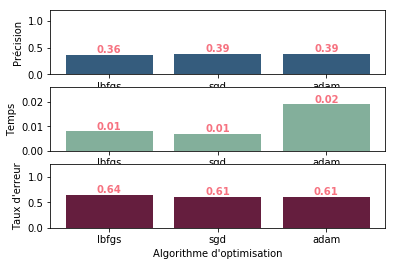

Meilleur solver pour la précision :  sgd
Meilleur solver pour le temps d'entraînement :  sgd


In [43]:
plt.subplot(3, 1, 1)
plt.bar(solvers , precisions, color='#355C7D')
plt.ylim(0,1.2)
for i in range(size):
    plt.text(solvers[i], precisions[i], 
             "%.2f"%precisions[i], fontweight='bold', 
             color='#F67280', ha='center', va='bottom')
plt.ylabel("Précision")
    
plt.subplot(3, 1, 2)
plt.bar(solvers , temps_execs, color='#83AF9B')
plt.ylim(0, max(temps_execs) + min(temps_execs))
for i in range(size):
    plt.text(solvers[i], temps_execs[i], 
             "%.2f"%temps_execs[i], fontweight='bold', 
             color='#F67280', ha='center', va='bottom')
plt.ylabel('Temps')

plt.subplot(3, 1, 3)
plt.bar(solvers , error_rate, color='#651E3E')
plt.ylim(0, max(error_rate) + min(error_rate))
for i in range(size):
    plt.text(solvers[i], error_rate[i], 
             "%.2f"%error_rate[i], fontweight='bold', 
             color='#F67280', ha='center', va='bottom')
plt.ylabel('Taux d\'erreur')

plt.xlabel("Algorithme d'optimisation")
plt.show() 

print("Meilleur solver pour la précision : ", 
      solvers[ np.argmax(precisions) ])
print("Meilleur solver pour le temps d'entraînement : ", 
      solvers[ np.argmin(temps_execs) ])

### Fonction d'activation

Les fonctions d'activation n'affecteront pas beaucoup sur le temps de calcul mais surtout sur la précision du résultat final

In [44]:
couche_optimal = 5
size_optimal = 30
hidden_layer_optimal = (couche_optimal)*(couche_optimal)
solver_optimal = 'sgd'

activations = ['identity', 'logistic', 'tanh', 'relu']
size = len(activations)
temps_execs = np.zeros(size)
precisions = np.zeros(size)
error_rate = np.zeros(size)

# split donnée
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    data, target, train_size=0.8, test_size=0.2)

for i in range(size):
    
    MLP_model = MLPClassifier(hidden_layer_sizes = hidden_layer_optimal, 
                              solver=solver_optimal, 
                              activation = activations[i])
    t_before = time()
    MLP_model.fit(x_train, y_train)
    
    t_after = time()
    y_predict = MLP_model.predict(x_test)
    
    temps_execs[i] = t_after - t_before
    precisions[i] = precision_score(y_test, y_predict, average='micro')
    error_rate[i] = 1 - accuracy_score(y_test, y_predict)
    print('.', end='')

....

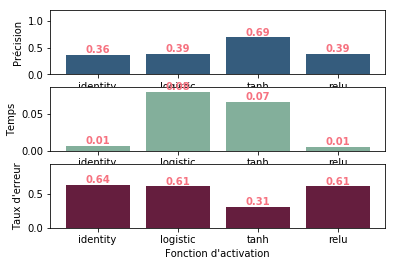

Meilleur activateur pour la précision :  tanh
Meilleur activateur pour le temps d'entraînement :  relu


In [45]:
plt.subplot(3, 1, 1)
plt.bar(activations , precisions, color='#355C7D')
plt.ylim(0,1.2)
for i in range(size):
    plt.text(i, precisions[i], 
             "%.2f"%precisions[i], fontweight='bold', 
             color='#F67280', ha='center', va='bottom')
plt.ylabel('Précision')
    
plt.subplot(3, 1, 2)
plt.bar(activations , temps_execs, color='#83AF9B')
plt.ylim(0, max(temps_execs) + min(temps_execs))
for i in range(size):
    plt.text(activations[i], temps_execs[i], 
             "%.2f"%temps_execs[i], fontweight='bold', 
             color='#F67280', ha='center', va='bottom')
plt.ylabel('Temps')

plt.subplot(3, 1, 3)
plt.bar(activations , error_rate, color='#651E3E')
plt.ylim(0, max(error_rate) + min(error_rate))
for i in range(size):
    plt.text(activations[i], error_rate[i], 
             "%.2f"%error_rate[i], fontweight='bold', 
             color='#F67280', ha='center', va='bottom')
plt.ylabel('Taux d\'erreur')

plt.xlabel("Fonction d'activation")
plt.show() 

print("Meilleur activateur pour la précision : ", 
      activations[ np.argmax(precisions) ])
print("Meilleur activateur pour le temps d'entraînement : ", 
      activations[ np.argmin(temps_execs) ])

### La régularisation L2 (paramètre α)

In [46]:
couche_optimal = 5
size_optimal = 30
hidden_layer_optimal = (couche_optimal)*(couche_optimal)
solver_optimal = 'sgd'
activateur_optimal = 'tanh'

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    data, target, train_size=0.8, test_size=0.2)
alphas      = np.arange(0, 12, 0.5)
size        = alphas.size
temps_execs = np.zeros(size)
precisions  = np.zeros(size)
error_rate  = np.zeros(size)

# split donnée
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    data, target, train_size=0.8, test_size=0.2)

for i in range(size):
    
    t_before = time()
    
    MLP_model = MLPClassifier(hidden_layer_sizes = hidden_layer_optimal, 
                              solver = solver_optimal, 
                              activation = activateur_optimal, 
                              alpha = alphas[i])
    MLP_model.fit(x_train, y_train)
    
    t_after = time()
    y_predict = MLP_model.predict(x_test)
    
    precisions[i] = precision_score(y_test, y_predict, average='micro')
    temps_execs[i] = t_after - t_before
    error_rate[i] = 1 - accuracy_score(y_test, y_predict)
    print('.', end='')

........................

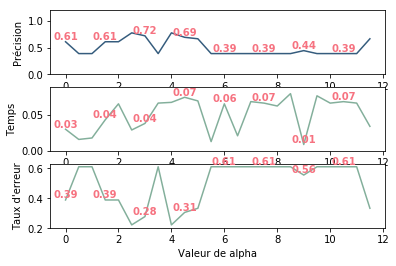

Meilleur alpha pour la précision :  2.5
Meilleur alpha pour le temps d'entraînement :  9.0


In [47]:
size = alphas.size

plt.subplot(3, 1, 1)
plt.plot(alphas , precisions, color='#355C7D')
plt.ylim(0,1.2)
for i in range(size):
    if(i % 3 == 0):
        plt.text(alphas[i], precisions[i], 
                 "%.2f"%precisions[i], fontweight='bold', 
                 color='#F67280', ha='center', va='bottom')
plt.ylabel('Précision')
    
plt.subplot(3, 1, 2)
plt.plot(alphas , temps_execs, color='#83AF9B')
plt.ylim(0, max(temps_execs) + min(temps_execs))
for i in range(size):
    if(i % 3 == 0):
        plt.text(alphas[i], temps_execs[i], 
                 "%.2f"%temps_execs[i], fontweight='bold', 
                 color='#F67280', ha='center', va='bottom')
plt.ylabel('Temps')

plt.subplot(3, 1, 3)
plt.plot(alphas , error_rate, color='#83AF9B')
for i in range(size):
    if(i % 3 == 0):
        plt.text(alphas[i], error_rate[i], 
                 "%.2f"%error_rate[i], fontweight='bold', 
                 color='#F67280', ha='center', va='bottom')
plt.ylabel('Taux d\'erreur')

plt.xlabel("Valeur de alpha")
plt.show() 

print("Meilleur alpha pour la précision : ", 
      alphas[ np.argmax(precisions) ])
print("Meilleur alpha pour le temps d'entraînement : ", 
      alphas[ np.argmin(temps_execs) ])

## Modèle le plus otimisé

Pour le problème de MNIST, les paramètre pour obtenir un compromise entre temps de calcul et précision sont:
- Nombre de couche: 2 - 4
- Size de chaque couche: 50 - 60
- Algorithme d'optimisation: adam
- Fonction d'activation: identity
- Régularisation L2: 0.5 <= alpha <= 2

Un modèle favorise un seul axe est très facile à décider: pour favoriser le temps de calcul on met en place le moindre des paramètres, pour favoriser la précision, on tente à mettre un grande nombre de couche et toutes en grande taille.
Mais ces choix ne sont pas pratiques.

## Conclusion

**ANN** a ses avantages et ses inconvénients:

### Avantages: 

- Cette méthode permets de modéliser n'importe quelle problème (en théorie, si on dispose les ressources à l'infinie, les données à l'infinie et capacité calcul à l'infinie).
- Elle permets également d'obtenir un résultat plus précis par rapport aux autres méthodes.
- On peut passer à l'échelle cette méthode. Les neuronne dans réseau accepte le calcul indépendant, donc favorisé pour déployer au système distribué.
    
### Inconvénients:

- **ANN** demande un capacité de calcul très coûteux, parfois moins efficaces par rapport à 2 autres méthodes. (Pour le même niveau de précision, ANN a besoin plus de temps pour l'apprentissage)
- Le choix des paramètres de **ANN** n'est pas évident, on ne peut pas non plus faire un test exhautive faute de son calcul gourmand.
- Pour l'apprentissage en temps réel ou en adaptation au changement du comportement, cette méthode n'est pas un choix idéal, vu impossible. C'est dû à la conception d'algorithmique: dans la phase d'apprentissage chaque couche doit attendre le résultat de celle précédente. Et ensuite dans l'étape de backpropagation, il faut calcul à chaque couche. Donc même avec les calculs distribués, on ne bénéfice pas grandement le parallélisme afin de booster le temps de calcul.